In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 15)

In [3]:
def show(img):
    if img.ndim == 2:
        plt.gray()
    plt.imshow(img)
    plt.show()

def show_grid(imgs, titles=None, cols=1):
    num_imgs = len(imgs)
    
    if titles is None:
        titles = [f"Image {i}" for i in range(num_imgs)]
        
    fig = plt.figure(figsize=(30, 30))
    
    for i, (img, title) in enumerate(zip(imgs, titles)):
        a = fig.add_subplot(cols, num_imgs // cols, i+1)
        if img.ndim == 2:
            plt.gray()
        plt.imshow(img)
        a.set_title(title)
    plt.show()

(375, 450)
375
450


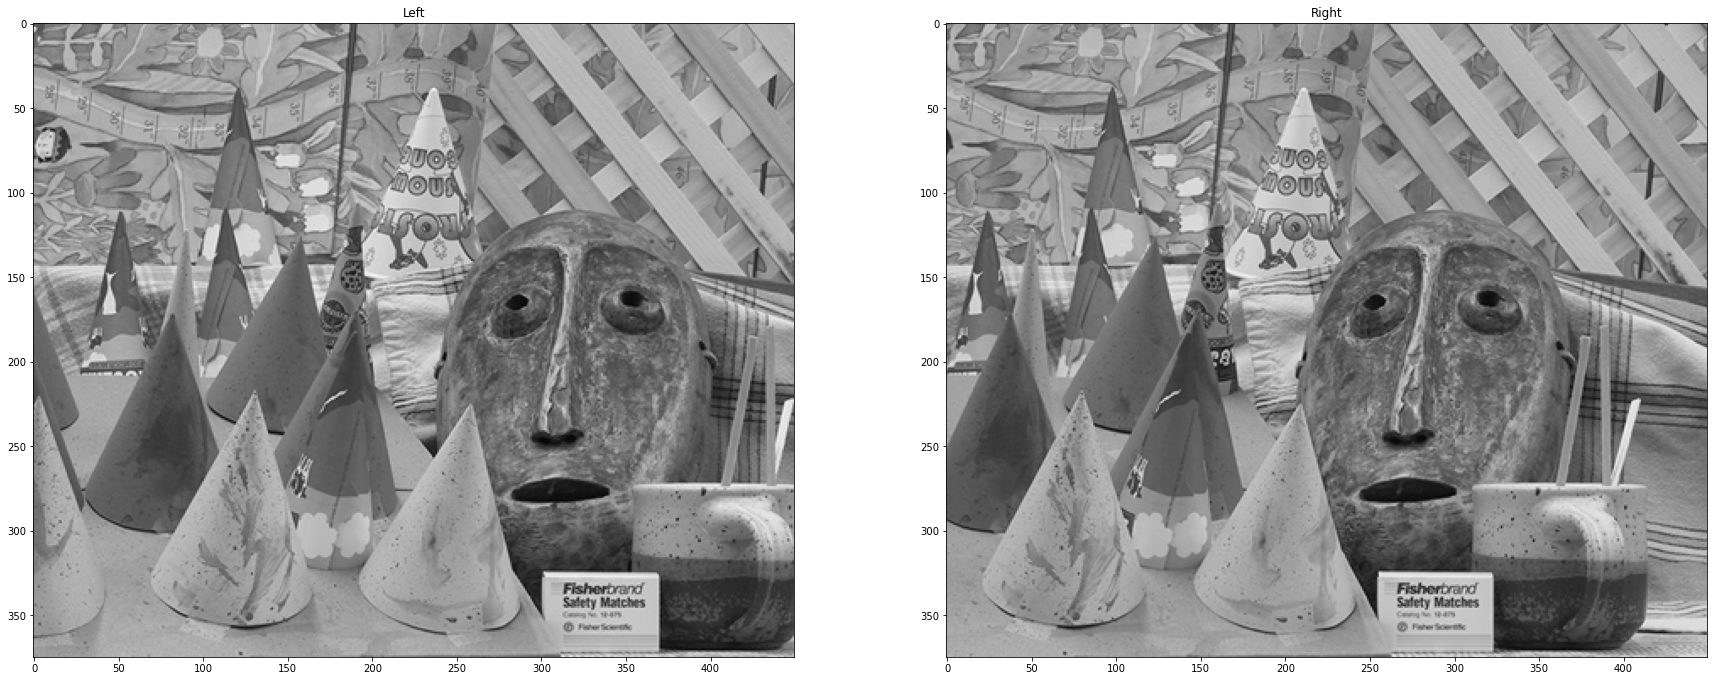

In [4]:
left_image = cv2.imread("im2.png", 0)  # query
right_image = cv2.imread("im6.png", 0)  # train
print(left_image.shape)


left = np.array(left_image,dtype='int64')
right = np.array(right_image,dtype='int64')   

h=left_image.shape[0]
w=left_image.shape[1]
print(h)
print(w)

show_grid([left_image, right_image], ["Left", "Right"])

In [5]:
kernel = 5 #parathiro
kernel_half = kernel // 2 
max_disparity = 50
print(kernel_half)
min_disparity = 0

disparity=np.zeros((left_image.shape[0],left_image.shape[1]))

2


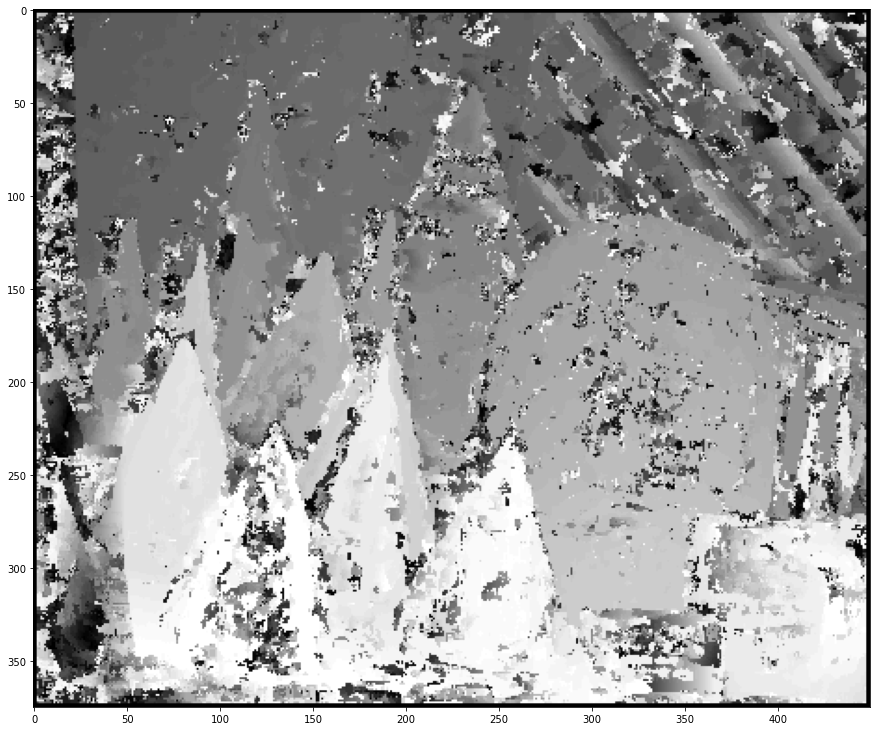

In [6]:
for y in range(kernel_half, h - kernel_half):      
    for x in range(kernel_half, w - kernel_half):
        prev_ssd = 65534
        tmp_ssd = 0 
        
        left_window = left_image[y-kernel_half:y+kernel_half+1, x-kernel_half:x+kernel_half+1]
        #left_window = left_image(0,0):left_image(5,5)
        
        start_x_right = max(kernel, x - max_disparity)
        end_x_right = min(w - kernel, x + max_disparity)
        for x_right in range(start_x_right, end_x_right): #(5,52) gia y=kernel_half=x
            right_window = right_image[y-kernel_half:y+kernel_half+1, x_right-kernel_half:x_right+kernel_half+1] 
            #right_image(0,3):right_image(5,55)
            tmp_ssd = ((left_window - right_window) ** 2).sum()
            
            if tmp_ssd < prev_ssd:
                prev_ssd = tmp_ssd
                min_disparity = abs(x - x_right)
                
        disparity[y, x] = min_disparity * 255 / max_disparity
show(disparity)
